In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import mrob

In [2]:
import sklearn.datasets

mean = np.array(0)
sigma = 0.03
norm_var = scipy.stats.multivariate_normal(mean,sigma)

In [3]:
N = 100
xi = np.zeros((N,6))
xi[:,0] = norm_var.rvs(N)

In [4]:
df = pd.DataFrame(xi)

In [5]:
print(df)

           0    1    2    3    4    5
0   0.007010  0.0  0.0  0.0  0.0  0.0
1   0.079642  0.0  0.0  0.0  0.0  0.0
2  -0.053179  0.0  0.0  0.0  0.0  0.0
3   0.280575  0.0  0.0  0.0  0.0  0.0
4  -0.145696  0.0  0.0  0.0  0.0  0.0
..       ...  ...  ...  ...  ...  ...
95 -0.038954  0.0  0.0  0.0  0.0  0.0
96  0.057306  0.0  0.0  0.0  0.0  0.0
97  0.225160  0.0  0.0  0.0  0.0  0.0
98  0.090509  0.0  0.0  0.0  0.0  0.0
99  0.142969  0.0  0.0  0.0  0.0  0.0

[100 rows x 6 columns]


In [6]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)

In [7]:
T_0 = mrob.geometry.SE3([0,0,0,0,0,0])
print(T_0.T())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [50]:
propagated = []


for i in range(len(xi)):
    xi[i][3] = 1
    tmp = mrob.geometry.SE3(mrob.geometry.SE3(xi[i]))
    propagated.append(tmp)

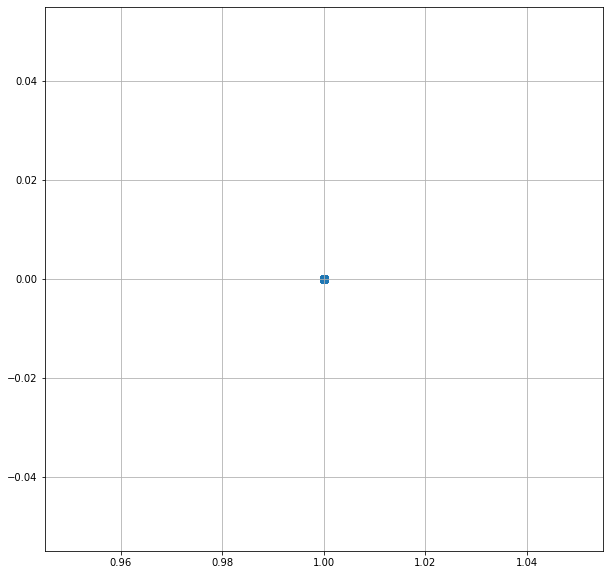

In [51]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1], lw=3)
plt.grid()
plt.show()

In [52]:
propagated[0].T()

array([[ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.99714724,  0.07548105,  0.        ],
       [ 0.        , -0.07548105,  0.99714724,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])